In [ ]:
%pip install git+https://github.com/openai/CLIP.git

In [ ]:

!pip install numpy==1.26.4

In [ ]:
!pip install torch==2.3.1 torchvision==0.18.1 torchaudio==2.3.1


In [ ]:
!pip install matplotlib

In [ ]:
import numpy as np
import torch
import torch.nn.functional as F
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import clip

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

In [ ]:
!pip install pinecone


image_features:torch.Size([9, 512])
single_image : torch.Size([512])
Similarity with image ./mix.png: 0.9291
Similarity with image ./whiteshoes.png: 0.9588
Similarity with image ./whiteshoesdouble.png: 0.9456
Similarity with image ./newwhite.png: 0.7826
Similarity with image ./whiteshoesopposite.png: 0.9723
Similarity with image ./image1.png: 0.8041
Similarity with image ./image2.png: 0.8049
Similarity with image ./image3.png: 0.7900
Similarity with image ./image4.png: 0.7793


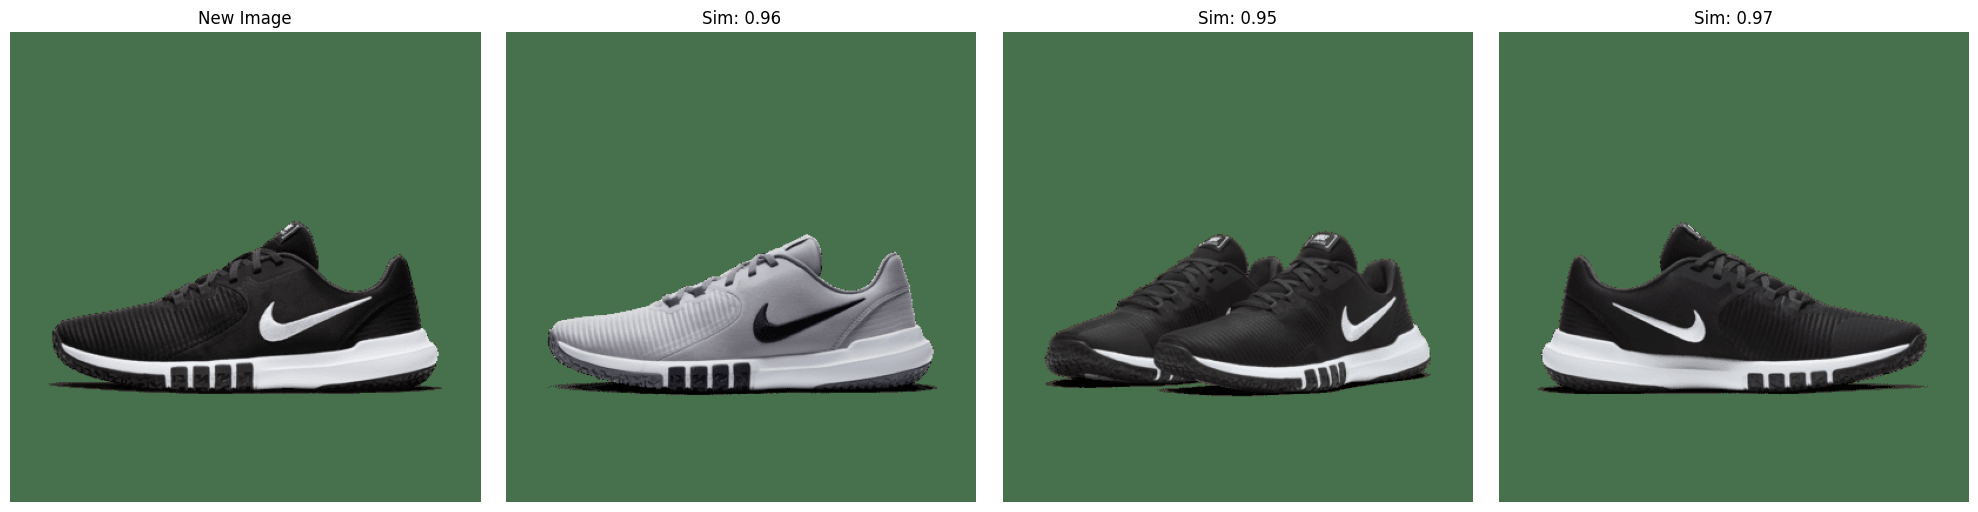

In [6]:
image_paths = ['./mix.png' ,'./whiteshoes.png','./whiteshoesdouble.png','./newwhite.png', './whiteshoesopposite.png' ,'./image1.png', './image2.png', './image3.png', './image4.png']
  
import os

new_image_path = './image5.png'

# Check if the file exists
if not os.path.exists(new_image_path):
    raise FileNotFoundError(f"The file '{new_image_path}' does not exist. Please check the file path.")

def get_features_from_image_path(image_paths):
    images = [preprocess(Image.open(image_path).convert("RGB")) for image_path in image_paths]
    image_input = torch.stack(images).to(device)
    with torch.no_grad():
        image_features = model.encode_image(image_input).float()
    print(f'image_features:{image_features.shape}')    
    return image_features
def get_feature_for_new_image(new_image_path):
    image = preprocess(Image.open(new_image_path).convert("RGB"))
    image = image.unsqueeze(0).to(device)
    with torch.no_grad():
        image_feature = model.encode_image(image).float()
    print(f"single_image : {image_feature.squeeze(0).shape}")     
    return image_feature.squeeze(0)

def cosine_similarity(v1, v2):
    return F.cosine_similarity(v1.unsqueeze(0), v2.unsqueeze(0)).item()

image_features = get_features_from_image_path(image_paths)
new_image_feature = get_feature_for_new_image(new_image_path)

similarities = []
for idx, feature in enumerate(image_features):
    sim = cosine_similarity(feature, new_image_feature)
    similarities.append((idx, sim))

for idx, sim in similarities:
    print(f"Similarity with image {image_paths[idx]}: {sim:.4f}")

threshold = 0.93
matching_images = [(idx, sim) for idx, sim in similarities if sim > threshold]

if matching_images:
    new_image = Image.open(new_image_path).convert("RGB")
    fig, axes = plt.subplots(1, len(matching_images) + 1, figsize=(5 * (len(matching_images) + 1), 5))
    axes[0].imshow(new_image)
    axes[0].axis('off')
    axes[0].set_title("New Image")
    for i, (idx, sim) in enumerate(matching_images):
        matched_image = Image.open(image_paths[idx]).convert("RGB")
        axes[i + 1].imshow(matched_image)
        axes[i + 1].axis('off')
        axes[i + 1].set_title(f"Sim: {sim:.2f}")

    plt.tight_layout()
    plt.show()
else:
    print("No images found with similarity greater than 0.90.")